# <a id='toc1_'></a>[<<<<<<<<<<< ***DIABETES PREDICTION USING SVM*** >>>>>>>>>>](#toc0_)

---

---

### <a id='toc1_1_1_'></a>[***1. Importing Dendencies***](#toc0_)

In [941]:
import pandas as pd
import numpy as np
import warnings 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [942]:
warnings.filterwarnings("ignore")

---

### <a id='toc1_1_2_'></a>[***2. Data Colletion and Loading***](#toc0_)

In [943]:
diabetes_data = pd.read_csv('diabetes.csv')

---

### <a id='toc1_1_3_'></a>[***3. Inspecting dataset***](#toc0_)

In [944]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [945]:
diabetes_data.shape

(768, 9)

In [946]:
columns = diabetes_data.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [947]:

diabetes_data= diabetes_data[~(diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] == 0).any(axis=1)]

In [948]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


---

#### <a id='toc1_1_3_1_'></a>[**Insights:**](#toc0_)
- *There are 768 rows and 9 columns in the dataset.*
- *There are no missing values in the dataset by seeing count row for every column*


***By seeing the data, we can say that outcome is out dependent variable and rest all are independent variables***

---

In [949]:
diabetes_data['Outcome'].value_counts().reset_index()

,Outcome,count
0,0,225
1,1,111


Here,
- 0 refers to Non-Diabetic
- 1 refers to Diabetic

In [950]:
import plotly.express as px
fig = px.pie(diabetes_data,names="Outcome",hole = 0.4,template = "plotly_dark")
fig.show()

***Imbalanced data set***

---

### <a id='toc1_1_4_'></a>[***4. Check the relation with target column***](#toc0_)

##### <a id='toc1_1_4_1_1_'></a>[**Let's check how our target variable relates to other varibles**](#toc0_)

In [951]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168889,111.146667,68.151111,26.746667,127.604444,31.052444,0.475467,28.964444
1,5.234234,144.846847,74.486486,32.549550,211.585586,34.820721,0.606342,37.657658


 <a id='toc1_1_4_1_2_'></a>[***We can observe that mean of every column is notably higher for individuals with diabetes compared to those who without diabetes***](#toc0_)

---

### <a id='toc1_1_5_'></a>[***5. Spilitng the dataset***](#toc0_)

In [952]:
X = diabetes_data.drop(columns='Outcome',axis=1)
Y = diabetes_data['Outcome']

In [953]:
fig = px.pie(Y,names="Outcome",hole = 0.4,template = "plotly_dark")
fig.show()

In [954]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
751            1      121             78             39       74  39.0   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  
3                       0.167   21  
6                       0.248   26  


### <a id='toc1_1_6_'></a>[**Train Test Split**](#toc0_)

In [955]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42,stratify=Y)

#
explanation = '''
Here, 
X = independent variable

Y = dependent variable

test_size = 0.2 => specifies the proportion of the dataset allocated to the testing set.

stratify = Y => ensures that the spliting process maintains the same proportion of targer class 
                is properly distributed in both training and testing sets.
                In this case, it ensures that target column y is properly distributed in both sets.
                
random_state = used for random number generater during the spliting process.

'''

---

### <a id='toc1_1_7_'></a>[***6. Loading the Model***](#toc0_)

In [956]:
classifier = svm.SVC(kernel='linear')

---

### <a id='toc1_1_8_'></a>[***7. Training the Model***](#toc0_)

In [957]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

---

### <a id='toc1_1_9_'></a>[***8. Evalution of the Model***](#toc0_)

In [958]:
# Accuracy Score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7761194029850746


In [959]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
     

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8088235294117647


Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       179
           1       0.69      0.60      0.64        89

    accuracy                           0.78       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.77      0.78      0.77       268

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.76      0.59      0.67        22

    accuracy                           0.81        68
   macro avg       0.79      0.75      0.77        68
weighted avg       0.80      0.81      0.80        68

Confusion Matrix (Test Data):
[[42  4]
 [ 9 13]]


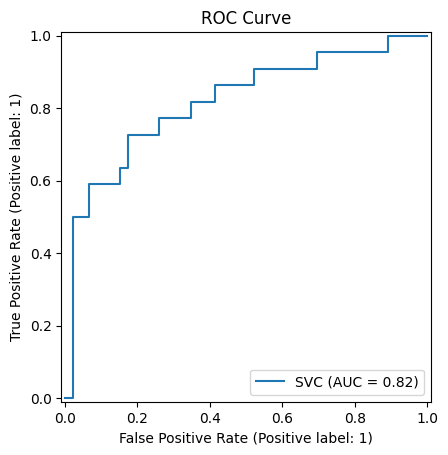

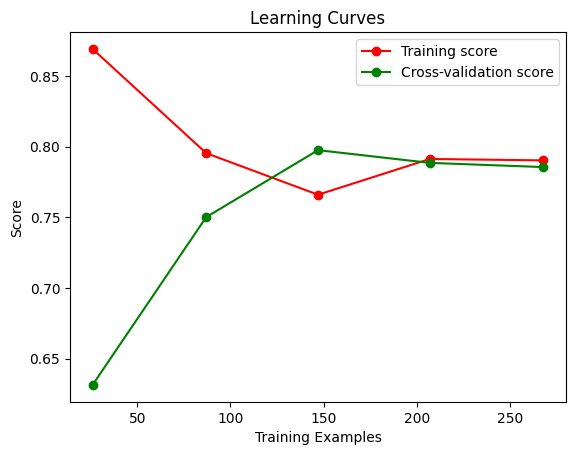

In [967]:
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming classifier is already trained and X_train, X_test, Y_train, Y_test are defined

# Additional Metrics
Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

print("Training Data Classification Report:")
print(classification_report(Y_train, Y_pred_train))

print("Test Data Classification Report:")
print(classification_report(Y_test, Y_pred_test))

print("Confusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_pred_test))

# ROC Curve
RocCurveDisplay.from_estimator(classifier, X_test, Y_test)
plt.title('ROC Curve')
plt.show()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(classifier, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


---

### <a id='toc1_1_10_'></a>[***9. Making a Predictive System***](#toc0_)

In [960]:
new_unseen_data = (5,166,72,19,175,25.8,0.587,51)

new_unseen_data_as_nparray = np.asarray(new_unseen_data)

unseen_data = new_unseen_data_as_nparray.reshape(1, -1)

prediction_result = classifier.predict(unseen_data)
print(prediction_result)

if (prediction_result[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic


---
---

### <a id='toc1_1_11_'></a>[***10. Saving the trained model using pickle***](#toc0_)

In [961]:
import pickle

In [962]:
filename = "saved_models/diabetics_model.sav"
pickle.dump(classifier,open(filename, "wb"))

In [963]:
loaded_model = pickle.load(open('saved_models/diabetics_model.sav','rb'))

In [964]:
new_unseen_data = (5,166,72,19,175,25.8,0.587,51)

new_unseen_data_as_nparray = np.asarray(new_unseen_data)

unseen_data = new_unseen_data_as_nparray.reshape(1, -1)

prediction_result = loaded_model.predict(unseen_data)
print(prediction_result)

if (prediction_result[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic
